# Dataset no. 3: Revision 

To start with the project I analysed the 3 datasets separately in order to reduce as much as I can the number of variables contained in each dataset. This is the analysis for dataset no. 3 which is the information regarding social performance.


Index:

<a class="anchor" id="index"></a>

1. [Importing the datasets - First check](#1)
2. [Missing values](#2)
3. [Feature selection using Random Forest](#3)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go

## 1. Importing the datasets - First check
<a class="anchor" id="1"></a>

[^Index](#index)

In [2]:
data = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/social-performance-dataset.csv')

In [3]:
data.head()

,MFI ID,MFI Name,Fiscal Year,Period Type,As of Date,Social goals > Target market > Women,Social goals > Target market > Adolescents and youth (below 18),Social goals > Target market > Clients living in urban areas,Social goals > Target market > Clients living in rural areas,Social goals > Target market > None of the above,...,Audit and Rating > Microfinance instituional rating > Yes,Audit and Rating > Microfinance instituional rating > No,Audit and Rating > Bank loan rating (long term facilities) > Yes,Audit and Rating > Bank loan rating (long term facilities) > No,Audit and Rating > Bank loan rating (short term facilities) > Yes,Audit and Rating > Bank loan rating (short term facilities) > No,Audit and Rating > CoCA rating > Yes,Audit and Rating > CoCA rating > No,Audit and Rating > Social performance rating > Yes,Audit and Rating > Social performance rating > No
0,100372,1st Valley Bank,2011,ANN,12/31/2011,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100372,1st Valley Bank,2012,ANN,12/31/2012,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100372,1st Valley Bank,2013,ANN,12/31/2013,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100372,1st Valley Bank,2014,ANN,12/31/2014,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100372,1st Valley Bank,2018,ANN,12/31/2018,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#I remove unnecessary colums:

data.drop(columns=['MFI ID'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Columns: 206 entries, MFI Name to Audit and Rating > Social performance rating > No
dtypes: float64(202), int64(1), object(3)
memory usage: 8.1+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,5171.0,2012.456778,2.236721,1999.0,2011.0,2013.0,2014.0,2018.0
Social goals > Target market > Women,5032.0,0.815978,0.387541,0.0,1.0,1.0,1.0,1.0
Social goals > Target market > Adolescents and youth (below 18),5032.0,0.216017,0.411567,0.0,0.0,0.0,0.0,1.0
Social goals > Target market > Clients living in urban areas,5032.0,0.748808,0.433742,0.0,0.0,1.0,1.0,1.0
Social goals > Target market > Clients living in rural areas,5032.0,0.801471,0.398932,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
Audit and Rating > Bank loan rating (short term facilities) > No,3248.0,0.005234,0.072168,0.0,0.0,0.0,0.0,1.0
Audit and Rating > CoCA rating > Yes,3248.0,0.007081,0.083865,0.0,0.0,0.0,0.0,1.0
Audit and Rating > CoCA rating > No,3248.0,0.000924,0.030382,0.0,0.0,0.0,0.0,1.0
Audit and Rating > Social performance rating > Yes,3248.0,0.004310,0.065522,0.0,0.0,0.0,0.0,1.0


## 2. Missing values
<a class="anchor" id="2"></a>

#[^Index](#index)

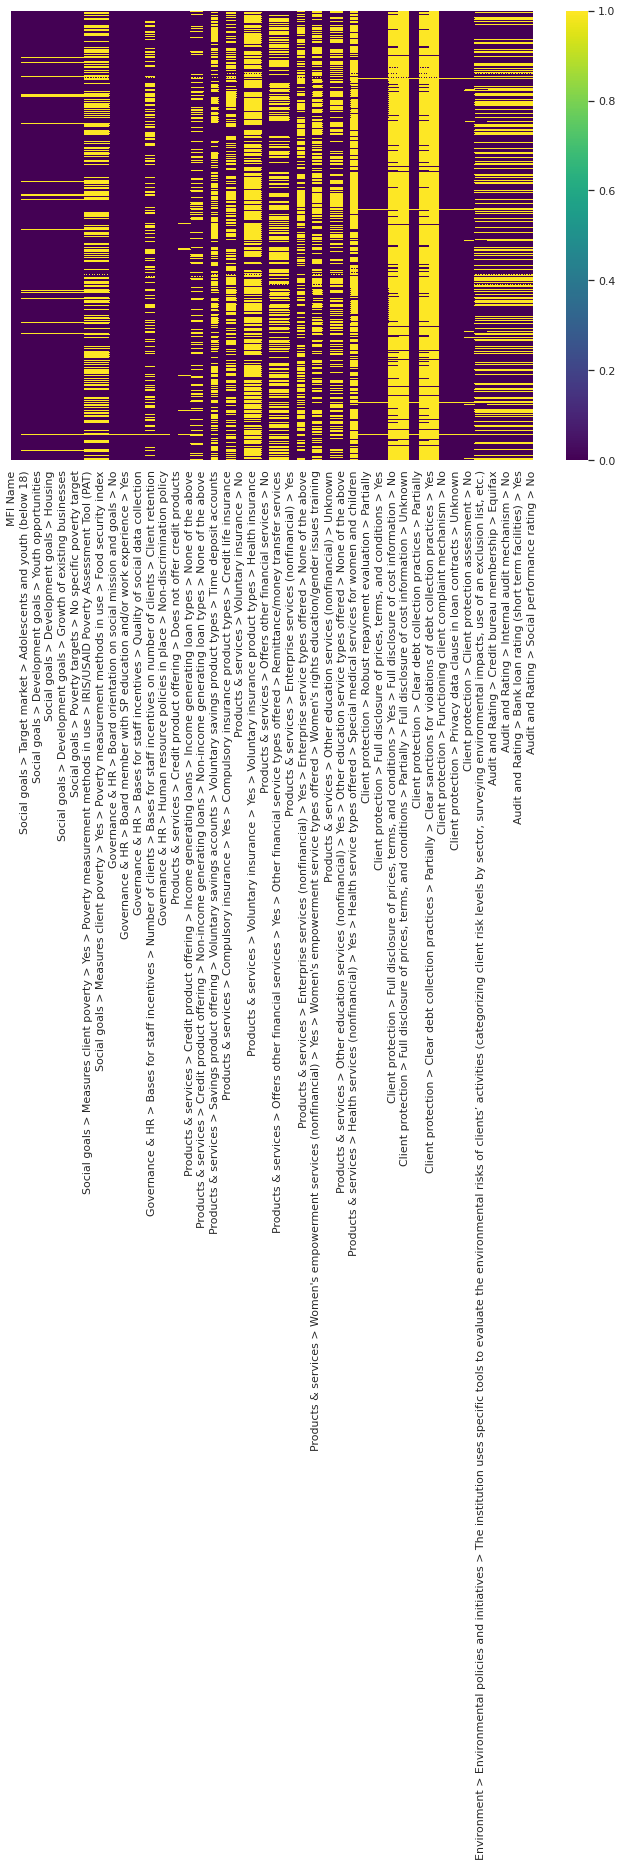

In [7]:
#The heatmap shows there are many missing values inthis dataset

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [8]:
#I want to know which is the percentage of data missing on each variable

def percentage_nullValues(data):
 
    null_perc = round(data.isnull().sum() / data.shape[0],3) * 100.00
    null_perc = pd.DataFrame(null_perc, columns=['Percentage_NaN'])
    null_perc= null_perc.sort_values(by = ['Percentage_NaN'], ascending = False)
    return null_perc

In [9]:
percentage_nullValues(data)

,Percentage_NaN
"Client protection > Full disclosure of prices, terms, and conditions > Partially > Full disclosure of cost information > Yes",96.3
"Client protection > Full disclosure of prices, terms, and conditions > Partially > Full disclosure of cost information > No",96.3
"Client protection > Full disclosure of prices, terms, and conditions > Partially > Full disclosure of cost information > Unknown",96.3
"Client protection > Full disclosure of prices, terms, and conditions > Partially > Full disclosure of cost information > Partially",96.3
Client protection > Clear debt collection practices > Partially > Clear sanctions for violations of debt collection practices > Yes,96.3
...,...
Products & services > Health services (nonfinancial) > No,0.1
Fiscal Year,0.0
As of Date,0.0
Period Type,0.0


In [10]:
#Then I select a threshold of 5% as this is my most valuable dataset 

data_missing = percentage_nullValues(data)

In [11]:
def select_threshold(data, thr):
   
    null_perc = percentage_nullValues(data)
      
    col_keep = null_perc[null_perc['Percentage_NaN'] <thr]
    col_keep = list(col_keep.index)
    print('Columns to keep:',len(col_keep))
    print('Those columns have a percentage of NaN less than', str(thr), ':')
    print(col_keep)
    data_c= data[col_keep]
    
    return data_c

In [12]:
data_missing = select_threshold(data, 5)
data_missing

Columns to keep: 111
Those columns have a percentage of NaN less than 5 :
['Client protection > Written policy on client collection practices > No', 'Client protection > Written policy on client collection practices > Yes', 'Client protection > Client protection assessment > No', 'Client protection > Client protection assessment > Yes', 'Social goals > Poverty targets > No specific poverty target', 'Social goals > Development goals > Growth of existing businesses', 'Social goals > Development goals > Development of start-up enterprises', 'Social goals > Poverty targets > Low income clients', 'Social goals > Measures client poverty > No', 'Social goals > Measures client poverty > Unknown', 'Social goals > Development goals > None of the above', 'Social goals > Development goals > Employment generation', 'Social goals > Development goals > Increased access to financial services', 'Social goals > Measures client poverty > Yes', 'Social goals > Development goals > Poverty reduction', 'Soci

,Client protection > Written policy on client collection practices > No,Client protection > Written policy on client collection practices > Yes,Client protection > Client protection assessment > No,Client protection > Client protection assessment > Yes,Social goals > Poverty targets > No specific poverty target,Social goals > Development goals > Growth of existing businesses,Social goals > Development goals > Development of start-up enterprises,Social goals > Poverty targets > Low income clients,Social goals > Measures client poverty > No,Social goals > Measures client poverty > Unknown,...,Products & services > Women's empowerment services (nonfinancial) > Unknown,Products & services > Other education services (nonfinancial) > Yes,Products & services > Other education services (nonfinancial) > No,Products & services > Other education services (nonfinancial) > Unknown,Products & services > Health services (nonfinancial) > Yes,Products & services > Health services (nonfinancial) > No,Fiscal Year,As of Date,Period Type,MFI Name
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2011,12/31/2011,ANN,1st Valley Bank
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2012,12/31/2012,ANN,1st Valley Bank
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2013,12/31/2013,ANN,1st Valley Bank
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2014,12/31/2014,ANN,1st Valley Bank
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2018,12/31/2018,ANN,1st Valley Bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2013,12/31/2013,ANN,Zhardem AS
5167,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2014,12/31/2014,ANN,Zhardem AS
5168,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2012,12/31/2012,ANN,Аltayskiy Fond Mikrozaymov
5169,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2013,12/31/2013,ANN,Аltayskiy Fond Mikrozaymov


In [13]:
data_missing.shape

(5171, 111)

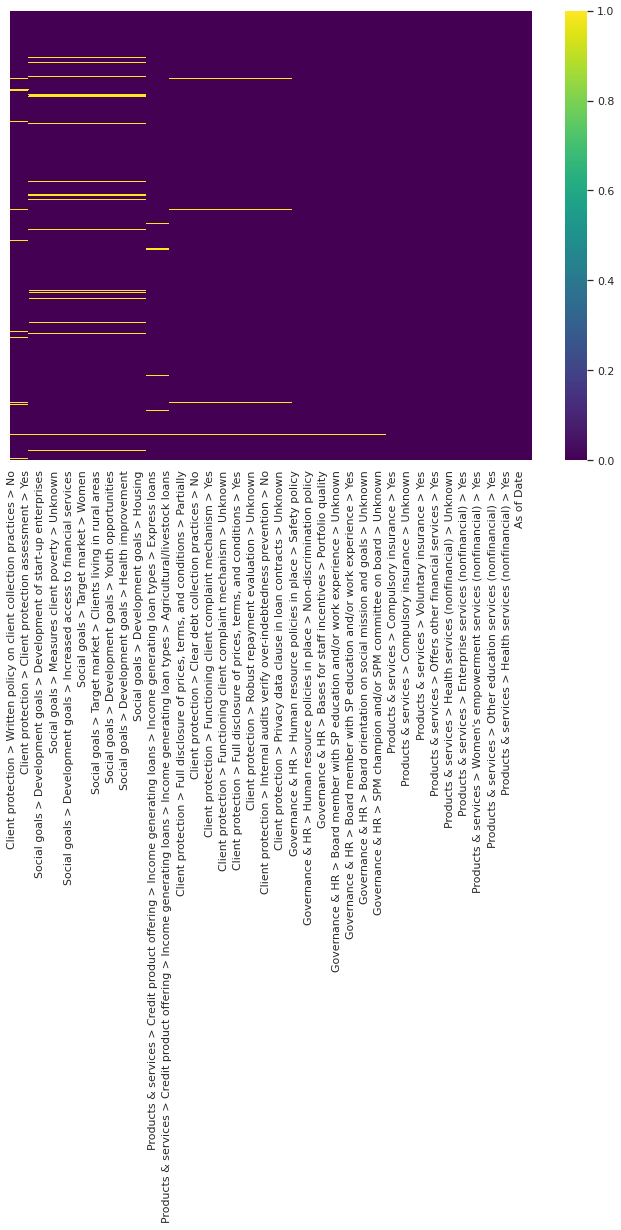

In [14]:
#Now looks my datasets is cleaner of nan values

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data_missing.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

Random Forest (feature selection)

In [15]:
#I want to replace the nan values for the mean (numerical) and mode (categorical) 

data2 = data_missing.copy()

In [16]:
remove = ['MFI Name', 'As of Date', 'Period Type']
data2 = data2[data2.columns.difference(remove)]

In [17]:
data2.shape

(5171, 108)

In [18]:
for column in data2: 
    if data2[column].dtype != 'object':
        data2[column] = data2[column].fillna(data2[column].mean())
    else:
        data2[column] = data2[column].fillna(data2[column].mode()[0])

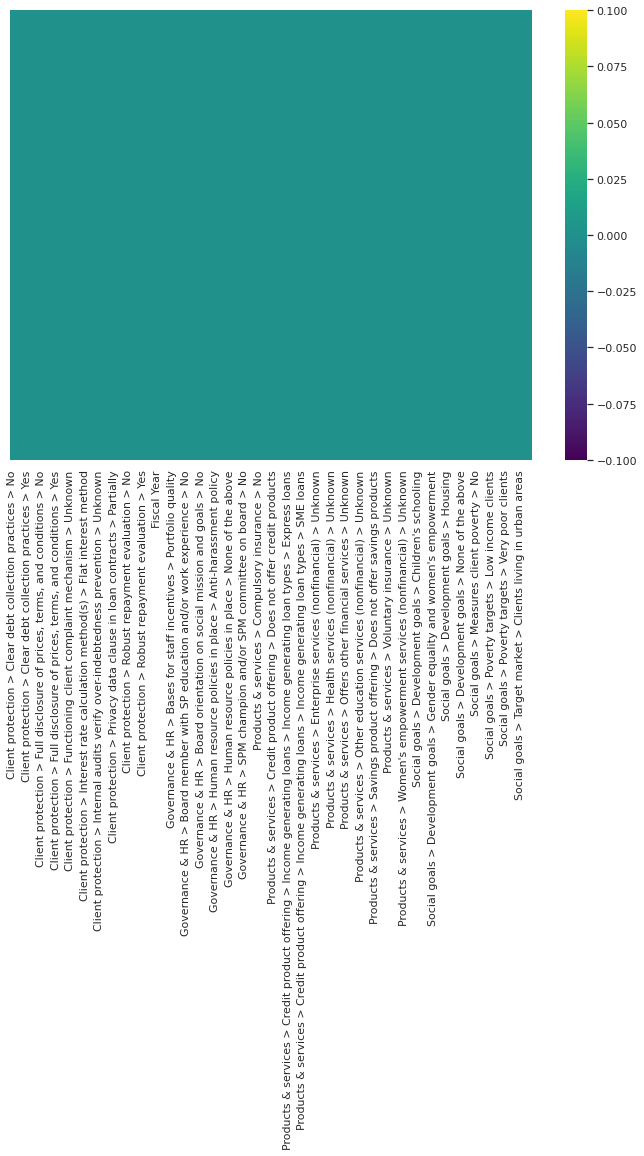

In [19]:
#My dataset is clean!

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data2.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

### 3. Feature selection using Random Forest
<a class="anchor" id="3"></a>

[^Index](#index)

In [20]:
#In order to select which variables will be more useful for further studies I use Random Forest method 
#to help me

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [21]:
X =  data2.drop('Fiscal Year', axis=1)
y = data2['Fiscal Year']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [24]:
sel.get_support()

array([False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False])

In [25]:
#68 variables have been selected from more than 200 we had at the beginning

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

68

In [26]:
print(selected_feat)

Index(['Client protection > Clear debt collection practices > Unknown',
       'Client protection > Clear debt collection practices > Yes',
       'Client protection > Full disclosure of prices, terms, and conditions > Yes',
       'Client protection > Functioning client complaint mechanism > No',
       'Client protection > Functioning client complaint mechanism > Yes',
       'Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Client protection > Internal audits verify over-indebtedness prevention > No',
       'Client protection > Internal audits verify over-indebtedness prevention > Unknown',
       'Client protection > Internal audits verify over-indebtedness prevention > Yes',
       'Client protection > Privacy data clause in loan contracts > Unknown',
       'Client protection > Privacy data clause in loan contracts > Yes',
       'Client p

Note: When selecting a column that says yes it shows: Yes / No / Nan values

In [27]:
data = data[['MFI Name', 'As of Date', 'Period Type', 'Fiscal Year', 'Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Governance & HR > Human resource policies in place > Anti-harassment policy',
       'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)',
       'Governance & HR > SPM champion and/or SPM committee on board > Yes',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans',
       'Products & services > Enterprise services (nonfinancial) > Yes',
       'Products & services > Other education services (nonfinancial) > Yes',
       "Products & services > Women's empowerment services (nonfinancial) > Yes",
       "Social goals > Development goals > Children's schooling",
       'Social goals > Development goals > Development of start-up enterprises',
       'Social goals > Development goals > Employment generation',
       "Social goals > Development goals > Gender equality and women's empowerment",
       'Social goals > Development goals > Health improvement',
       'Social goals > Development goals > Housing',
       'Social goals > Development goals > Improvement of adult education',
       'Social goals > Development goals > Increased access to financial services',
       'Social goals > Development goals > Poverty reduction',
       'Social goals > Measures client poverty > Yes',
       'Social goals > Poverty targets > Low income clients',
       'Social goals > Poverty targets > Poor clients',
       'Social goals > Poverty targets > Very poor clients',
       'Social goals > Target market > Adolescents and youth (below 18)',
       'Social goals > Target market > Clients living in urban areas',
       'Social goals > Target market > Women']]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 30 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   MFI Name                                                                                                                               5171 non-null   object 
 1   As of Date                                                                                                                             5171 non-null   object 
 2   Period Type                                                                                                                            5171 non-null   object 
 3   Fiscal Year                                                         

In [29]:
df = data.copy()

In [30]:
percentage_nullValues(df)

,Percentage_NaN
Social goals > Development goals > Development of start-up enterprises,2.7
Social goals > Development goals > Employment generation,2.7
Social goals > Target market > Clients living in urban areas,2.7
Social goals > Target market > Adolescents and youth (below 18),2.7
Social goals > Poverty targets > Very poor clients,2.7
Social goals > Poverty targets > Poor clients,2.7
Social goals > Poverty targets > Low income clients,2.7
Social goals > Measures client poverty > Yes,2.7
Social goals > Development goals > Poverty reduction,2.7
Social goals > Development goals > Increased access to financial services,2.7


In [31]:
df.dropna(axis=0, inplace=True)

In [32]:
df.shape

(4899, 30)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4899 entries, 0 to 5170
Data columns (total 30 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   MFI Name                                                                                                                               4899 non-null   object 
 1   As of Date                                                                                                                             4899 non-null   object 
 2   Period Type                                                                                                                            4899 non-null   object 
 3   Fiscal Year                                                         

In [34]:
#All variables are floats: Can I convert them into integers? YES!
df['Client protection > Interest rate calculation method(s) > Declining balance interest method'].unique()

array([0., 1.])

In [35]:
df[['Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Governance & HR > Human resource policies in place > Anti-harassment policy',
       'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)',
       'Governance & HR > SPM champion and/or SPM committee on board > Yes',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans',
       'Products & services > Enterprise services (nonfinancial) > Yes',
       'Products & services > Other education services (nonfinancial) > Yes',
       "Products & services > Women's empowerment services (nonfinancial) > Yes",
       "Social goals > Development goals > Children's schooling",
       'Social goals > Development goals > Development of start-up enterprises',
       'Social goals > Development goals > Employment generation',
       "Social goals > Development goals > Gender equality and women's empowerment",
       'Social goals > Development goals > Health improvement',
       'Social goals > Development goals > Housing',
       'Social goals > Development goals > Improvement of adult education',
       'Social goals > Development goals > Increased access to financial services',
       'Social goals > Development goals > Poverty reduction',
       'Social goals > Measures client poverty > Yes',
       'Social goals > Poverty targets > Low income clients',
       'Social goals > Poverty targets > Poor clients',
       'Social goals > Poverty targets > Very poor clients',
       'Social goals > Target market > Adolescents and youth (below 18)',
       'Social goals > Target market > Clients living in urban areas',
       'Social goals > Target market > Women']] = df[['Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Governance & HR > Human resource policies in place > Anti-harassment policy',
       'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)',
       'Governance & HR > SPM champion and/or SPM committee on board > Yes',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans',
       'Products & services > Enterprise services (nonfinancial) > Yes',
       'Products & services > Other education services (nonfinancial) > Yes',
       "Products & services > Women's empowerment services (nonfinancial) > Yes",
       "Social goals > Development goals > Children's schooling",
       'Social goals > Development goals > Development of start-up enterprises',
       'Social goals > Development goals > Employment generation',
       "Social goals > Development goals > Gender equality and women's empowerment",
       'Social goals > Development goals > Health improvement',
       'Social goals > Development goals > Housing',
       'Social goals > Development goals > Improvement of adult education',
       'Social goals > Development goals > Increased access to financial services',
       'Social goals > Development goals > Poverty reduction',
       'Social goals > Measures client poverty > Yes',
       'Social goals > Poverty targets > Low income clients',
       'Social goals > Poverty targets > Poor clients',
       'Social goals > Poverty targets > Very poor clients',
       'Social goals > Target market > Adolescents and youth (below 18)',
       'Social goals > Target market > Clients living in urban areas',
       'Social goals > Target market > Women']].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4899 entries, 0 to 5170
Data columns (total 30 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                 --------------  ----- 
 0   MFI Name                                                                                                                               4899 non-null   object
 1   As of Date                                                                                                                             4899 non-null   object
 2   Period Type                                                                                                                            4899 non-null   object
 3   Fiscal Year                                                              

In [37]:
df.head()

,MFI Name,As of Date,Period Type,Fiscal Year,Client protection > Interest rate calculation method(s) > Declining balance interest method,Client protection > Interest rate calculation method(s) > Flat interest method,Governance & HR > Human resource policies in place > Anti-harassment policy,Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution),Governance & HR > SPM champion and/or SPM committee on board > Yes,Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans,...,Social goals > Development goals > Improvement of adult education,Social goals > Development goals > Increased access to financial services,Social goals > Development goals > Poverty reduction,Social goals > Measures client poverty > Yes,Social goals > Poverty targets > Low income clients,Social goals > Poverty targets > Poor clients,Social goals > Poverty targets > Very poor clients,Social goals > Target market > Adolescents and youth (below 18),Social goals > Target market > Clients living in urban areas,Social goals > Target market > Women
0,1st Valley Bank,12/31/2011,ANN,2011,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
1,1st Valley Bank,12/31/2012,ANN,2012,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
2,1st Valley Bank,12/31/2013,ANN,2013,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
3,1st Valley Bank,12/31/2014,ANN,2014,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
4,1st Valley Bank,12/31/2018,ANN,2018,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,1


In [38]:
#These are the columns I am keeping in the end after using Random Forest and common sense

df.columns

Index(['MFI Name', 'As of Date', 'Period Type', 'Fiscal Year',
       'Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Governance & HR > Human resource policies in place > Anti-harassment policy',
       'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)',
       'Governance & HR > SPM champion and/or SPM committee on board > Yes',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans',
       'Products & services > Enterprise services (nonfinancial) > Yes',
       'Products & services > Other education services (nonfinancial) > Yes',
       'Products & services > Wome

In [39]:
df.to_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/social_dataset_selectedf.csv')